# Finding Heavy Traffic Indicators on I-94
## Objective:
In this project, we are going to find out what are the indicators that affect the traffic on the interstate high way of I-94 in the US.

The dataset was made available by John Hogue. 
Here you can find the dataset : [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

Note that the station recorded the traffic data located approximately between Minneapolis and Saint Paul. Also, the station only recorded westboun traffic (cars moving from the east to the west). Therefore, the result of our analysis is not for the entire I-94 highway.

In [1]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv') 
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analysing Traffic Volume
The first analysis we are conducting is to analyse the traffic volume.

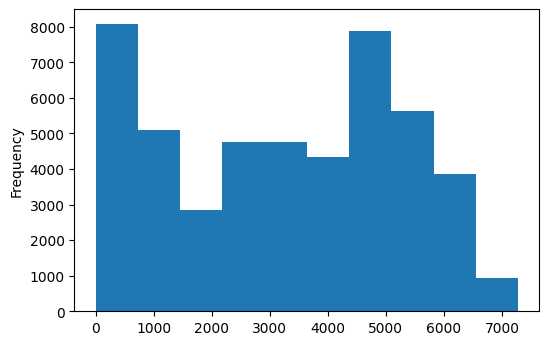

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Observation:

From the histogram and the statistics we found that 25% or less of the traffic volumn were below 1,193 or less; and another 25% of the traffic volumn were above 4,933 or more. 

This is an interesting finding that lead us to think of if it was related to the day- and night-time.

Thus, we will separate day- and nighe-time of the day to see what will traffic volumn be like.

## - Traffic Volume: Day vs. Night
We devide the dataset into two parts:
- Datetime data: hours from 7:00 to 19:00
- Nighttime data: hours from 19:00 to 7:00

In [6]:
# Transfer date_time column to datetime
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

In [7]:
# Isolate the daytime data
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

# Isolate the nighttime data
night = i_94.copy()[(i_94['date_time'].dt.hour < 7) | (i_94['date_time'].dt.hour > 19)]
print(night.shape)

(23877, 9)
(22366, 9)


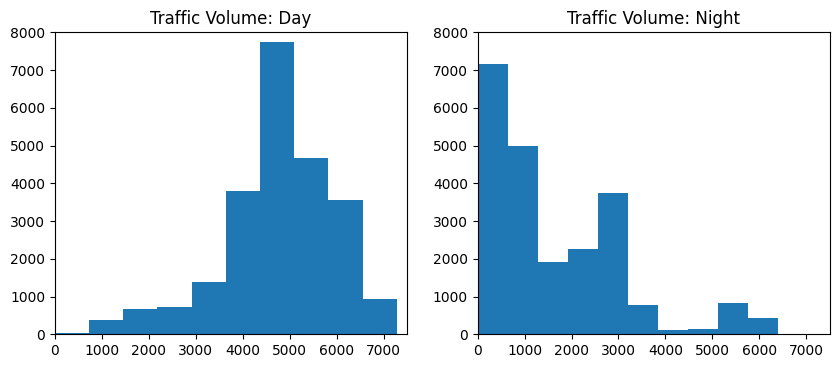

In [8]:
# Day- and Nighttime grid chart
plt.figure(figsize=(10,4))
# Daytime histogram
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

# Nighttime histogram
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

plt.show()

In [9]:
# Daytime statistics
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
# Nighttime statistics
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

### Observation:

The histogram of the daytime traffic volume is left skewed. This means that most of the traffic volume values are high. As we can see, there are 4,252 or more cars passing the station each hour (75% of the time).

The histogram of the nighttime traffic volume is right skewed. This means that most of the traffic volume values are low. We can see that there are 2,630 or less cars passing the station each hour (75% of the time).

Our goal is to find out what are the indicators caussing the traffic, so we will only focus on analysing the daytime values.


## - Time Indicators: Month vs. Traffic Volume

             temp   rain_1h   snow_1h  clouds_all  traffic_volume
month                                                            
1      265.483409  0.015080  0.000631   58.554108     4495.613727
2      266.663789  0.004019  0.000000   51.550459     4711.198394
3      273.619940  0.015839  0.000000   56.827811     4889.409560
4      279.661071  0.105343  0.000000   59.221525     4906.894305
5      289.282668  0.130863  0.000000   56.548825     4911.121609
6      294.576068  0.271121  0.000000   48.612374     4898.019566
7      296.785052  4.412258  0.000000   42.176619     4595.035744
8      295.119191  0.228113  0.000000   42.556892     4928.302035
9      292.520287  0.289807  0.000000   45.184112     4870.783145
10     284.081011  0.016065  0.000000   53.497990     4921.234922
11     276.698007  0.006200  0.000000   56.697187     4704.094319
12     267.727846  0.035365  0.002213   66.942237     4374.834566


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894

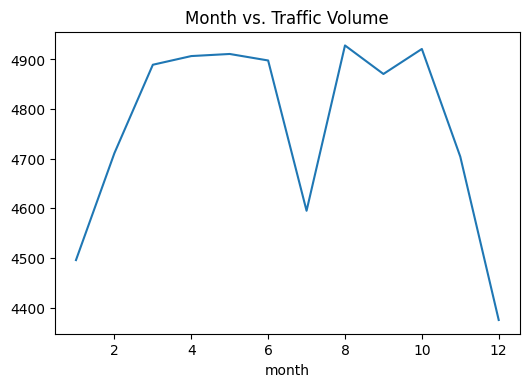

In [11]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.title('Month vs. Traffic Volume')
print(by_month)
print('\n')
print(by_month['traffic_volume'])

### Observations:
Heavy traffics are concentrated during March to June and August to October.
In other words, the traffic looks less heavy during cold months (November to Feburary) and intense in warm months(March to October), except for July. 

Why there is less traffic during July?

## - Time Indicators: Year vs. Traffic Volume

            temp   rain_1h   snow_1h  clouds_all  traffic_volume      month
year                                                                       
2012  275.846975  0.000000  0.000000   66.133997     4675.346861  11.062787
2013  280.003337  0.134236  0.000000   53.891145     4834.084298   6.236600
2014  278.152433  0.287366  0.000000   51.987912     4765.309296   3.918299
2015  289.060314  0.237949  0.002233   43.819580     4748.448485   9.042424
2016  283.675922  2.269275  0.000274   52.542247     4637.518293   6.942509
2017  282.341220  0.000000  0.000000   54.954867     4865.961752   6.499904
2018  283.825283  0.135757  0.000000   51.989171     4726.280534   5.088643


year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64


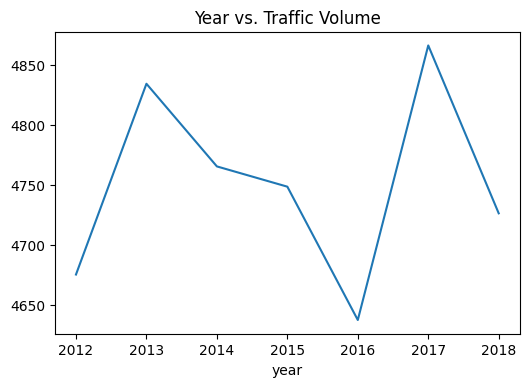

In [12]:
day['year'] = day['date_time'].dt.year
by_year = day.groupby('year').mean()
by_year['traffic_volume'].plot.line()
plt.title('Year vs. Traffic Volume')

print(by_year)
print('\n')
print(by_year['traffic_volume'])

### Observations:
We found that during the traffic varies each year. 
Year 2012, 2016 and 2018 had relatively less traffics.
Year 2013 and 2017 had relatively heavy traffics.

## - Day of the week vs.Traffic Volume

                 temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
dayofweek                                                               
0          282.262755  2.923823  0.000017   57.508053     4893.551286   
1          282.301770  0.129172  0.000194   52.333234     5189.004782   
2          282.198316  0.068099  0.001091   53.662119     5284.454282   
3          282.279115  0.172436  0.000148   53.993191     5311.303730   
4          282.181216  0.092828  0.000225   51.412200     5291.600829   
5          282.300646  0.107596  0.000094   50.446376     3927.249558   
6          282.280340  0.133170  0.000000   52.288699     3436.541789   

              month         year  
dayofweek                         
0          6.401243  2015.524442  
1          6.458757  2015.582487  
2          6.619158  2015.491147  
3          6.501184  2015.484902  
4          6.575067  2015.514954  
5          6.498821  2015.527991  
6          6.604179  2015.444379  


dayofweek
0    4893.55128

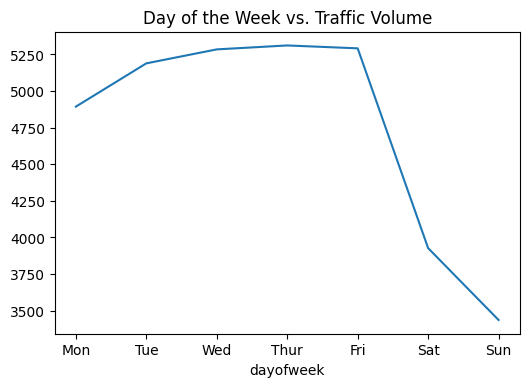

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Day of the Week vs. Traffic Volume')
print(by_dayofweek)
print('\n')
print(by_dayofweek['traffic_volume'])

### Observations:
From the line chart of 'Day of the Week vs. Traffic Volume', we can see that most heavy traffic are during week days (Monday to Friday).

## - Time Indicators: Time of the day v.s Traffic Volume

Because we already knew that there are more traffic during the week days comparing the weekends. We have to analyse time of the day in two seperate situation - Business days and Weekends.

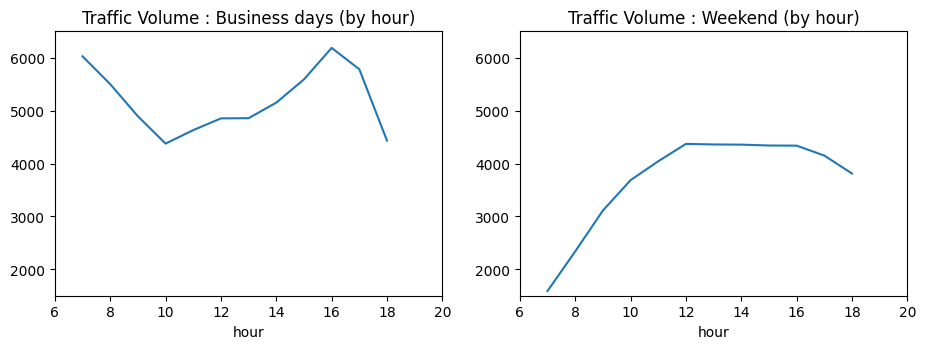

In [14]:
day['hour'] = day['date_time'].dt.hour

# Seperate week of days into business days and weekends
business_days = day.copy()[day['dayofweek'] <= 4] 
# 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5]
# 5 == Saturday

by_hour_business = business_days.groupby('hour').mean()
# business_days.groupby('hour') == business_days.grouby(business_days['hour'])

by_hour_weekend = weekend.groupby('hour').mean()

# print two line plots on a grid chart
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume : Business days (by hour)')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume : Weekend (by hour)')

plt.show()



### Observations:
During business days, the traffic volume is heavier each hour than those on the weekends. There are two peak hours during the business days, 7:00 and 16:00. The traffic volume is more than 6,000 cars. This is expected to be the time when people are commuting to work and back. 

### Brief Summerisation:
Some time-related indicators are found in our analysis:

- Traffic is heavier in the warm months (March to October) compared to cold months (November to Feburary).
- More traffic volume happens during the daytime and concentrated in the weekdays (Monday to Friday).
- In the weekdays, the rush hours are on 7:00 and 16:00 when people are commuting to work and back.

## - Weather Indicators
First, we analyse the association between traffic volume and all other numerical weather columns.

day.info()

In [15]:
# Find the correlation between Traffic Volume and all other weather indicators columes.
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

### Observations:
We found that temperature has the strongest correlation with traffic volume.
Let's make a scatter plot of them.

In [16]:
day['temp'].describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

In [17]:
day['temp'].value_counts().sort_index()

0.00      2
243.39    1
243.62    1
245.70    2
246.15    2
         ..
308.87    1
308.95    1
309.08    1
309.29    1
310.07    1
Name: temp, Length: 5111, dtype: int64

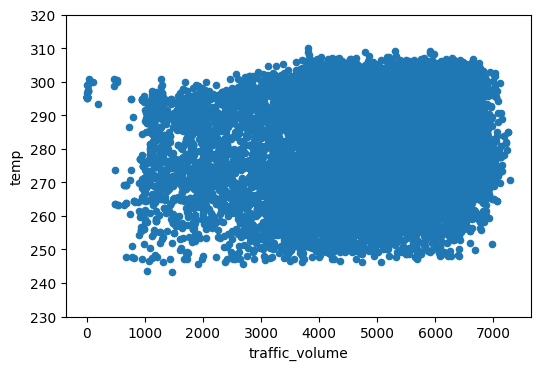

In [18]:
# Scatter plot between temperature and traffic volume.
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320) # two wrong 0k temperature mess up the y-axis
plt.show()

This scatter plot shows us that temperature might not a solid indicator of heave traffic.

## - Weather Types

After analysing the relationship between traffic volume and all other numerical weather columns, we are going to check if any interesting between traffic volume and other categorical weather-related columns (`weather_main` and `weather_description`).


In [19]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

print(by_weather_main['traffic_volume'])
print('\n')
print(by_weather_description['traffic_volume'].sort_values(ascending=False))

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64


weather_description
shower snow                            5664.000000
light rain and snow                    5579.750000
proximity thunderstorm with drizzle    5121.833333
thunderstorm with light drizzle        4960.000000
scattered clouds                       4936.787712
shower drizzle                         4932.666667
Sky is Clear                           4919.009390
proximity shower rain                  4901.756757
light intensity drizzle                4890.164049
overcast clouds                        4861.124952
light rain                             4859.650849
few clouds                             4839.818023
broken c

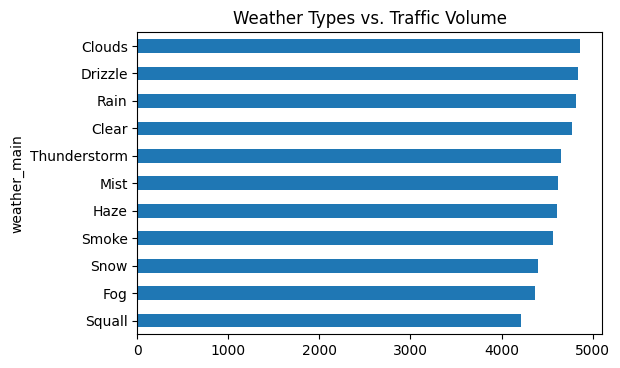

In [20]:
# weather_main vs. traffic_volume
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.title('Weather Types vs. Traffic Volume')
plt.show()

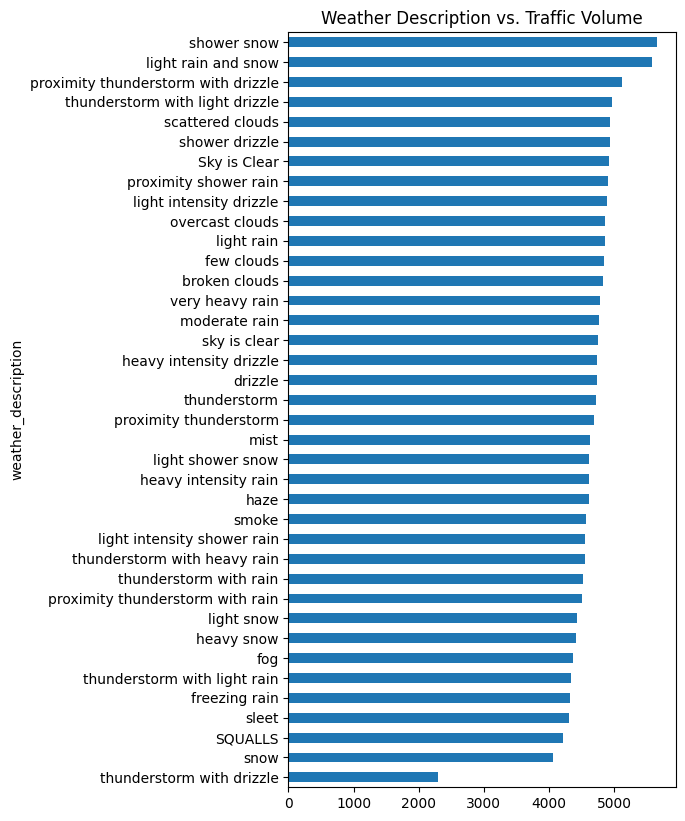

In [21]:
# weather_description vs. traffic_volume
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(5,10))
plt.title('Weather Description vs. Traffic Volume')
plt.show()

### Observations:
There are three weather types that have traffic volume more than 5,000.
- shower snow
- light rain and snow
- proximity thunderstorm with drizzle

It is still unclear why there are more cars on the road in these weather type. Perhaps in this weather types, people would rather ride a car instead or taking a public transportation, a bike or on a walk.

## Conclusion:

In this project, we try to find out the indicators that affect the traffic on the interstate highy way, 1-94.
As we noticed that during the daytime (7:00 - 19:00), the traffic is usually busy, we focus our analysis on this period.

Here are the findinds we have:

- Time Indicators:
    - The traffic is busier during wearm period (March to October) and less during cold period (November to Feburary).
    - The traffic is busier between week days than weekends. And the peak at the week days are 7:00 and 16:00, which are supposed for the time people are commuting to work or back home.

- Weather Indicators:
    - shower snow
    - light rain and snow
    - proximity thunderstorm with drizzle